In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deep_macrofin import PDEModel
from deep_macrofin import ActivationType, Comparator, Constraint, EndogVar, EndogVarConditions, EndogEquation, LayerType, OptimizerType, System, plot_loss_df

In [2]:
latex_var_mapping = {
    # constants
    r"V_{bat}": "Vbat",
    r"V_{cap}": "Vcap",
    r"v_{zz,\alpha}": "vzza",
    r"v_{zz,\beta}": "vzzb",
    r"v_{zz,0}": "vzz0",
    r"\hat{v_{zz}}": "vzz_hat",
    r"\omega_o" : "oo",

    r"i_\alpha" : "ia",
    r"i_\beta" : "ib",
    r"i_0" : "i0",

    r"m_\alpha": "ma",
    r"m_\beta": "mb",
    r"m_0": "m0",
    r"\hat{m}": "m_hat",
}

In [3]:
pde_model = PDEModel("problem1", {"num_epochs": 10000, "loss_log_interval": 100, "optimizer_type": OptimizerType.Adam}, latex_var_mapping)
pde_model.set_state(["t"], {"t": [0., 1.]})
pde_model.add_endogs(["ia", "ib", "i0"])
pde_model.add_params({
    "vzz_hat": 2.0,
    "oo": torch.pi,
    "vzz0": 0,
    "m0": 0,
    "m_hat": 1,

    "Vbat": 2000,
    "Vcap": 200,

    "L_a": 10**(-6),
    "L_b": 10**(-6),
    "L_c": 10**(-6),

    "R_a": 1000,
    "R_b": 1000,
    "R_c": 1000,
})

pde_model.add_equation(r"$v_{zz,\alpha} = \hat{v_{zz}} * cos(\omega_o * t)$")
pde_model.add_equation(r"$v_{zz,\beta} = \hat{v_{zz}} * sin(\omega_o * t)$")
pde_model.add_equation(r"$m_\alpha = \hat{m} * cos(\omega_o * t)$")
pde_model.add_equation(r"$m_\beta = \hat{m} * sin(\omega_o * t)$")

pde_model.add_endog_equation(r"$m_\alpha * \frac{V_{cap}}{2} - (\frac{2}{3} * L_a + \frac{1}{6} * L_b+\frac{1}{6} * L_c) * \frac{\partial i_\alpha}{\partial t} - (\frac{3^{1/2}}{6} * L_c - \frac{3^{1/2}}{6} * L_b) * \frac{\partial i_\beta}{\partial t} - (\frac{2}{3} * L_a-\frac{1}{3} * L_b-\frac{1}{3} * L_c) * \frac{\partial i_0}{\partial t} + v_{zz,\alpha} -  (\frac{2}{3} * R_a + \frac{1}{6} * R_b+\frac{1}{6} * R_c) * i_\alpha - (\frac{3^{1/2}}{6} * R_c - \frac{3^{1/2}}{6} * R_b) * i_\beta - (\frac{2}{3} * R_a-\frac{1}{3} * R_b-\frac{1}{3} * R_c) * i_0 =0$")
pde_model.add_endog_equation(r"$m_\beta * \frac{V_{cap}}{2} - (\frac{3^{1/2}}{6} * L_c - \frac{3^{1/2}}{6} * L_b) * \frac{\partial i_\alpha}{\partial t} - (\frac{L_b}{2}+\frac{L_c}{2}) * \frac{\partial i_\beta}{\partial t} - (\frac{3^{1/2}}{3} * L_b - \frac{3^{1/2}}{3} * L_c) * \frac{\partial i_0}{\partial t} + v_{zz,\beta} -  (\frac{3^{1/2}}{6} * R_c - \frac{3^{1/2}}{6} * R_b) * i_\alpha - (\frac{R_b}{2}+\frac{R_c}{2}) * i_\beta - (\frac{3^{1/2}}{3} * R_b - \frac{3^{1/2}}{3} * R_c) * i_0 =0$")
pde_model.add_endog_equation(r"$V_{bat}-V_{cap}+m_0 * \frac{V_{cap}}{2} - (\frac{L_a}{3}-\frac{L_b}{6}-\frac{L_c}{6}) * \frac{\partial i_\alpha}{\partial t} - (\frac{3^{1/2}}{6} * L_b-\frac{3^{1/2}}{6} * L_c) * \frac{\partial i_\beta}{\partial t} - (\frac{L_a}{3} + \frac{L_b}{3} + \frac{L_c}{3}) * \frac{\partial i_0}{\partial t} + v_{zz,0} -  (\frac{R_a}{3}-\frac{R_b}{6}-\frac{R_c}{6}) * i_\alpha - (\frac{3^{1/2}}{6} * R_b-\frac{3^{1/2}}{6} * R_c) * i_\beta - (\frac{R_a}{3} + \frac{R_b}{3} + \frac{R_c}{3}) * i_0 =0$")

print(pde_model)
if not os.path.exists("./models/electrical/model.pt"):
    pde_model.train_model("./models/electrical", "model.pt", True)
    pde_model.load_model(torch.load("./models/electrical/model_best.pt"))
    pde_model.eval_model(True)
else:
    pde_model.load_model(torch.load("./models/electrical/model_best.pt"))
    pde_model.eval_model(True)

===========================Summary of Model problem1============================
Config: {
 "batch_size": 100,
 "num_epochs": 10000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam"
}
Latex Variable Mapping:
{
 "V_{bat}": "Vbat",
 "V_{cap}": "Vcap",
 "v_{zz,\\alpha}": "vzza",
 "v_{zz,\\beta}": "vzzb",
 "v_{zz,0}": "vzz0",
 "\\hat{v_{zz}}": "vzz_hat",
 "\\omega_o": "oo",
 "i_\\alpha": "ia",
 "i_\\beta": "ib",
 "i_0": "i0",
 "m_\\alpha": "ma",
 "m_\\beta": "mb",
 "m_0": "m0",
 "\\hat{m}": "m_hat"
}
User Defined Parameters:
{
 "vzz_hat": 2.0,
 "oo": 3.141592653589793,
 "vzz0": 0,
 "m0": 0,
 "m_hat": 1,
 "Vbat": 2000,
 "Vcap": 200,
 "L_a": 1e-06,
 "L_b": 1e-06,
 "L_c": 1e-06,
 "R_a": 1000,
 "R_b": 1000,
 "R_c": 1000
}

================================State Variables=================================
t: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions===============================

Model loaded


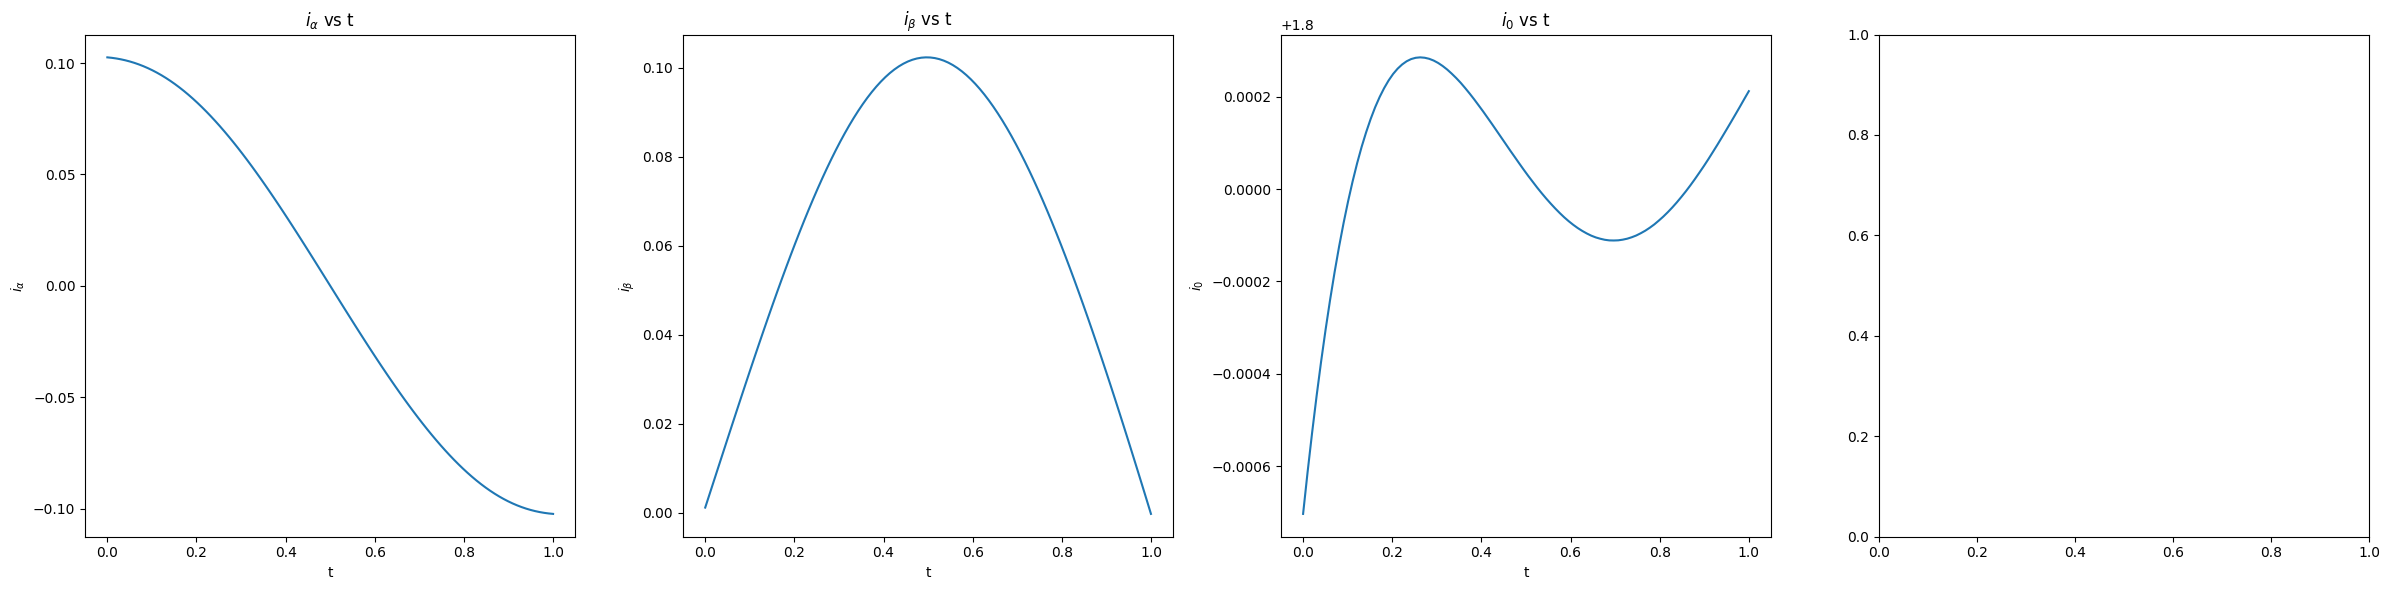

In [4]:
pde_model.load_model(torch.load("./models/electrical/model_best.pt"))
pde_model.plot_vars([r"$i_\alpha$", r"$i_\beta$", r"$i_0$",])

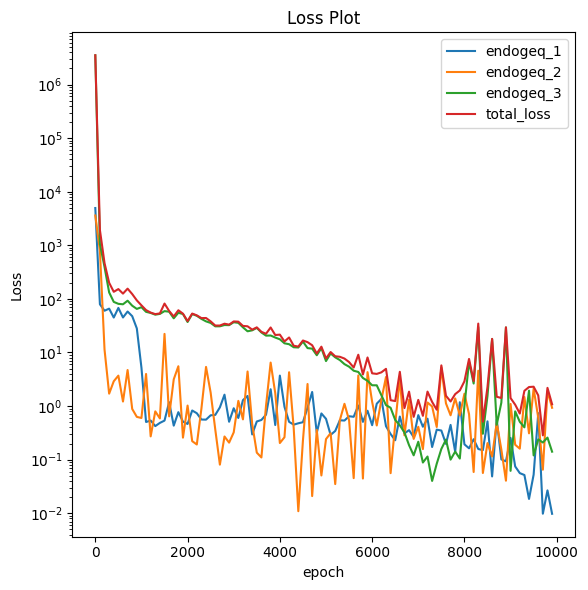

In [5]:
plot_loss_df(fn="./models/electrical/model_loss.csv", loss_plot_fn="./models/electrical/model_loss.png")